<a href="https://colab.research.google.com/github/KevinEnriquez96/Proyecto-de-titulacion/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installation of libraries**

### **[LazyPredict](https://github.com/shankarpandala/lazypredict)**
Library to run many sklearn's binary classifiers with default parameters

In [1]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Importación, obtención de datos y tratamiento previo**

In [2]:
# Download and unzip 
from urllib.request import urlopen
from io import BytesIO
from zipfile import ZipFile

# Data manipulation and EDA
import pandas as pd
import numpy as np

# Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Clasificadores de machine learning
import lazypredict
import pickle
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, balanced_accuracy_score, roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from matplotlib_venn import venn3
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize

# Google colab
from google.colab import files
import io

In [3]:
uploaded = files.upload()

Saving DatosFiltrados_Etiqueta.csv to DatosFiltrados_Etiqueta.csv


In [4]:
filename = "DatosFiltrados_Etiqueta.csv" # this must match the name of the file you uploaded
df = pd.read_csv(io.StringIO(uploaded[filename].decode("utf-8")))

## **Preparación de matrices de características**
  

### **Load molecular descriptors (features) - training and test datasets**

In [30]:
# Crear el conjunto de datos de etiquetas y
y = df['etiqueta'].copy()

y = y.map({"Sujeto sin efectos de alcohol": 0, "Sujeto bajo efectos de alcohol": 1}).to_numpy()

In [31]:
# Cree la matriz de características borrando la columna y y el nombre de la muestra
final_df = df.drop(['etiqueta'], axis=1)
X = final_df.to_numpy()

## **Exploratory Data Analysis**

### **Target variable**

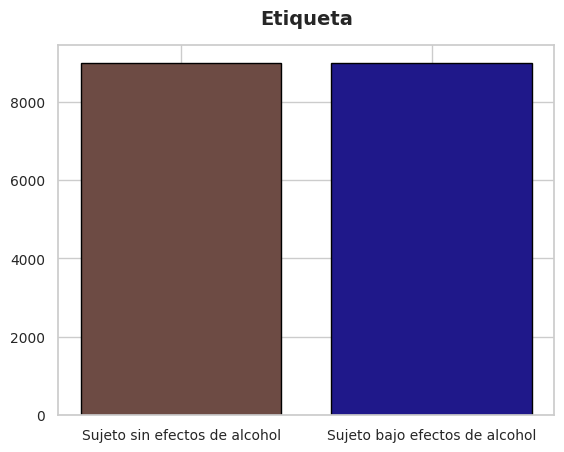

In [37]:
# Data
n_cuerdo = (df["etiqueta"] == "Sujeto sin efectos de alcohol").sum()
n_chum = (df["etiqueta"] == "Sujeto bajo efectos de alcohol").sum()


x_label = ['Sujeto sin efectos de alcohol', 
           'Sujeto bajo efectos de alcohol']
y_label = [n_cuerdo, n_chum]

# Setup plot
fig, ax = plt.subplots()

# Hacer gráfico de barras
p = ax.bar(x_label, y_label, color = ['#6D4B44', '#1F188A'], ec = 'black')

ax.set_title('Etiqueta', fontsize=14, fontweight='bold', pad=15)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

## **Modelos de aprendizaje automático**
En primer lugar, probamos más de 30 clasificadores binarios ML utilizando la biblioteca [LazyPredict](https://github.com/shankarpandala/lazypredict) de Python. Elegimos el mejor modelo evaluando algunas métricas de rendimiento (por ejemplo, precisión, ROC AUC, puntuación F1 y coeficiente de correlación de Matthews) en el conjunto de datos de prueba.

In [12]:
# Ejecutar los clasificadores ML con LazyPredict     
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state =42, stratify=y)

In [13]:
# Define and build the Lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)

models, predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:50<00:00,  1.73s/it]


In [14]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
LabelPropagation,0.98,0.98,0.98,0.98,0.97,6.93
LabelSpreading,0.98,0.98,0.98,0.98,0.96,11.34
KNeighborsClassifier,0.95,0.95,0.95,0.95,0.91,0.45
ExtraTreesClassifier,0.94,0.94,0.94,0.94,0.88,1.14
RandomForestClassifier,0.93,0.93,0.93,0.93,0.85,4.10
BaggingClassifier,0.91,0.91,0.91,0.91,0.82,1.16
XGBClassifier,0.90,0.90,0.90,0.90,0.79,2.47
LGBMClassifier,0.88,0.88,0.88,0.88,0.76,0.28
DecisionTreeClassifier,0.87,0.87,0.87,0.87,0.75,0.22


In [15]:
# Exportar resultados como csv
models.to_csv("Results_allMLclassifiers_alldiseases.csv")

[(0.0, 1.0)]

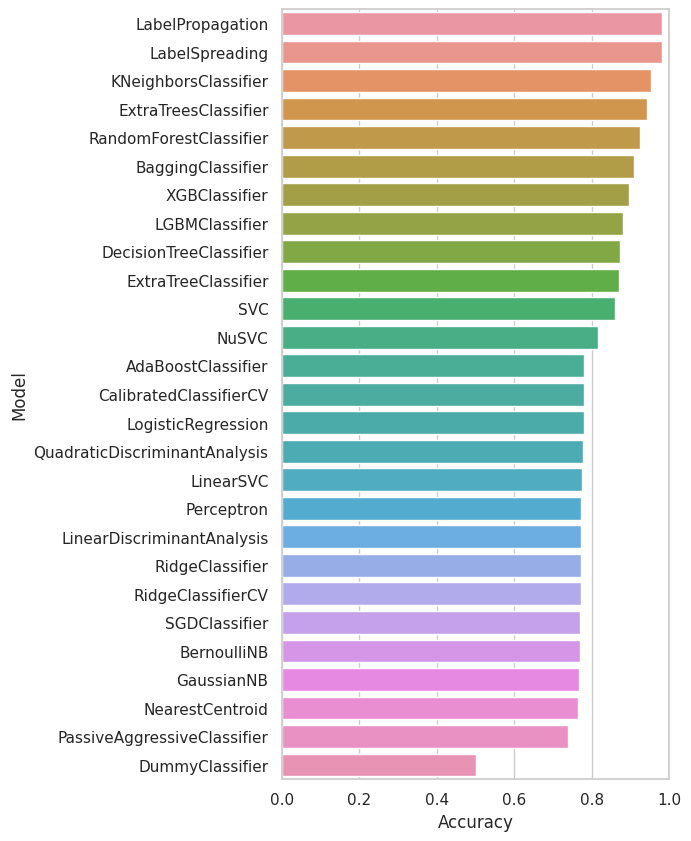

In [17]:
# Plot of Accuracy
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", 
                 data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

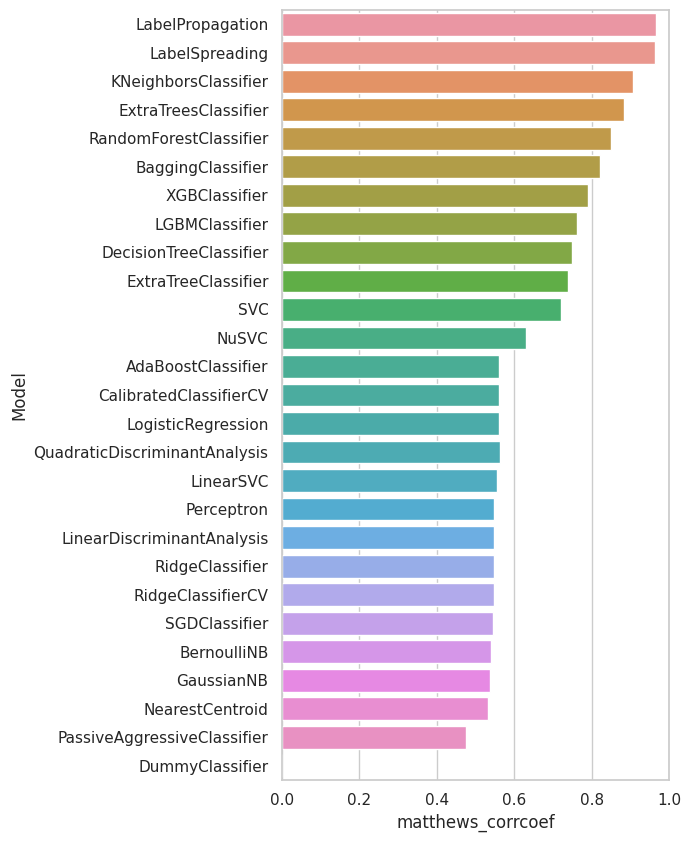

In [18]:
# Parcela de MCC
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, 
                 x="matthews_corrcoef", data=models)
ax.set(xlim=(0, 1))

In [19]:
# Aplicación de los mejores modelos
best_model1 = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=42))
best_model1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])

In [20]:
# Función para calcular las métricas de rendimiento
def performance_metrics(y, y_pred):
  acc = accuracy_score(y, y_pred)

  bal_acc = balanced_accuracy_score(y, y_pred)

  prec = precision_score(y, y_pred, average = 'weighted')

  recall = recall_score(y, y_pred,  average = 'weighted')

  f1score = f1_score(y, y_pred,  average = 'weighted')

  mcc = matthews_corrcoef(y, y_pred)

  results = [acc, bal_acc, prec, recall, f1score, mcc]

  return results

In [21]:
# Conjunto de datos para almacenar métricas de rendimiento
results_bestMLmodel = pd.DataFrame()

In [22]:
# Predicción de valores con el mejor modelo en conjuntos de datos de prueba y externos
y_test_pred = best_model1.predict(X_test)

# Calcular las métricas de rendimiento de los conjuntos de datos de prueba y externos
results_bestMLmodel["Performance_metric"] = ['Accuracy', 'Balanced accuracy', 
                                                  'Precision', 'Recall', 'F1score', 'MCC']


results_bestMLmodel["Test_dataset"] = performance_metrics(y_test, y_test_pred)

In [23]:
# Ordenar el marco de datos por métrica de rendimiento
results_bestMLmodel.sort_values(by=['Performance_metric']).reset_index(drop=True)

,Performance_metric,Test_dataset
0,Accuracy,0.78
1,Balanced accuracy,0.78
2,F1score,0.78
3,MCC,0.56
4,Precision,0.78
5,Recall,0.78


### **Importancia de las características del mejor modelo**

In [24]:
# RRecuperar la importancia de las características de los mejores modelos
importance_bestmodel1 = pd.Series(best_model1[1].feature_importances_, name = 'Gini')

# Recuperar nombres de características
feature_names = pd.Series(final_df.columns, name = 'Feature')

In [25]:
# Combinar los nombres de las características y los valores de Gini en un marco de datos
feat_import_bestmodel1 = pd.concat([feature_names, importance_bestmodel1], axis=1, names=['Feature', 'Gini'])

# Ordenar el marco de datos por Gini en orden descendente
featimp_bestmodel1_sort = feat_import_bestmodel1.sort_values('Gini', ascending=False)

In [26]:
# Exportación de conjuntos de datos ordenados sobre la importancia de las características
featimp_bestmodel1_sort.to_csv("Important_genes_alldiseases_RandomForest_sorted.csv")

[(0.0, 1.0)]

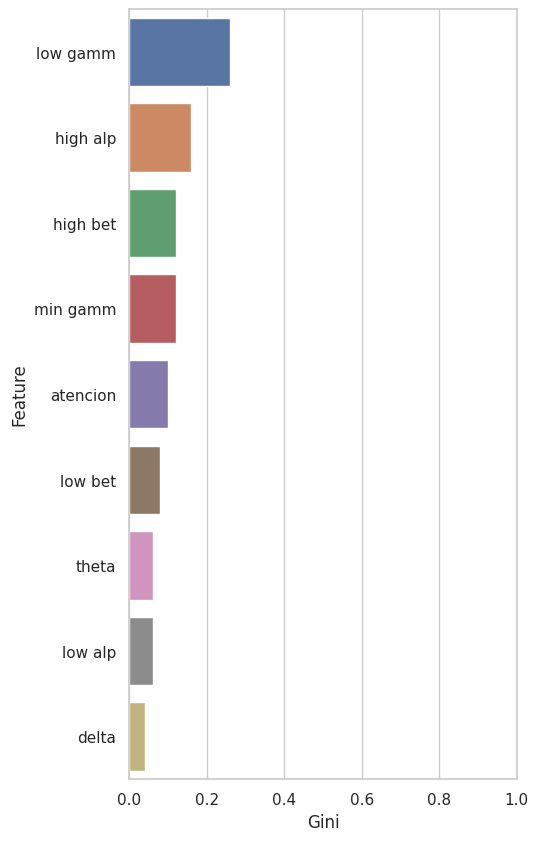

In [27]:
# Gráfico de la importancia de las características de los 3 algoritmos
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
# fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(33, 15))
ax = sns.barplot(y = 'Feature', 
                 x = 'Gini', data=featimp_bestmodel1_sort.iloc[0:19])
ax.set(xlim=(0, 1))

### **Save the best model into a file**

In [28]:
# Definir el nombre del archivo de salida
output_file = f'bestAdaboostClassifier.bin'
output_file

'bestAdaboostClassifier.bin'

In [ ]:
# Exportar el archivo binario del mejor modelo
with open(output_file, "wb") as f_out:
    pickle.dump(best_model1[1], f_out)

## **Import the best model**

In [ ]:
model_file = 'bestAdaboostClassifier.bin'

In [ ]:
with open(model_file, 'rb') as f_in:
        model = pickle.load(f_in)

## **Make predictions**

In [ ]:
test = pd.DataFrame(final_df.loc[600, :]).T

In [ ]:
test

,atencion,theta,low alp,high alp,low gamm,min gamm
600,43.67,30846.00,26911.05,32391.66,30992.25,20663.55


In [ ]:
# Make the predictions
model.predict(test)

array([1])

In [ ]:
df

,atencion,theta,low alp,high alp,low gamm,min gamm,etiqueta
0,25.24,20107.61,14351.27,5571.25,1479.72,1107.37,cuerdo
1,46.18,28078.41,17450.88,7413.46,2048.06,1566.24,cuerdo
2,62.83,33886.27,19632.24,8937.07,2473.98,1923.16,cuerdo
3,75.62,37772.22,20998.60,10169.29,2772.35,2187.21,cuerdo
4,84.95,39977.29,21653.22,11137.34,2958.04,2367.45,cuerdo
...,...,...,...,...,...,...,...
640,22.16,43075.35,28425.71,17249.68,23033.57,20513.56,chumado
641,23.43,38456.04,26364.62,15594.31,23028.99,19886.32,chumado
642,24.44,31868.22,23227.48,13525.23,22225.96,18603.22,chumado
643,25.08,23078.77,18896.48,11015.37,20480.56,16572.56,chumado


---